# 6 Decisions Trees

In [4]:
import pandas as pd
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-02 10:51:27--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.1s    

2025-11-02 10:51:28 (6.58 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



## Preparing the dataset 

In [19]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [20]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [21]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [24]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
# after
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [26]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [27]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [29]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

num_cylinders
[ 3.  5. nan  4.  1.]
14

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
[17.7 17.8 15.1 20.2 14.4]
162

model_year
[2003 2007 2018 2009 2008]
24

origin
['europe' 'usa' 'asia']
3

fuel_type
['gasoline' 'diesel']
2

drivetrain
['all-wheel_drive' 'front-wheel_drive']
2

num_doors
[ 0.  2. -1.  1. nan]
9

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [30]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [31]:
# Checking missing values

df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [35]:
df = df.fillna(0)
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [37]:
df.describe().round()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.0,9704.0,9704.0,9704.0,9704.0,9704.0,9704.0,9704.0
mean,200.0,4.0,139.0,3001.0,14.0,2011.0,-0.0,15.0
std,49.0,2.0,48.0,498.0,5.0,7.0,1.0,3.0
min,10.0,0.0,0.0,953.0,0.0,2000.0,-4.0,6.0
25%,170.0,2.0,124.0,2666.0,13.0,2006.0,-1.0,13.0
50%,200.0,4.0,146.0,2993.0,15.0,2012.0,0.0,15.0
75%,230.0,5.0,168.0,3335.0,16.0,2017.0,1.0,17.0
max,380.0,13.0,271.0,4739.0,24.0,2023.0,4.0,26.0


In [ ]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [45]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [46]:
y_val

array([2.96732849, 2.79380831, 2.96743186, ..., 2.76405158, 2.69680661,
       2.84311999])

In [47]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [48]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

## Question 1

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable. 

* Train a model with `max_depth=1`.

Which feature is used for splitting the data?
* `'vehicle_weight'`
* `'model_year'`
* `'origin'`
* `'fuel_type'`

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [54]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [55]:
print(export_text(dtr, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3138.49
|   |--- value: [2.86]
|--- vehicle_weight >  3138.49
|   |--- value: [2.60]



## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 0.045
* 0.45
* 4.5
* 45.0

In [61]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_val)

In [71]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [72]:
y_val_original = np.expm1(y_val)
y_pred_original = np.expm1(y_pred)

print("RMSE: ", round(rmse(y_val_original, y_pred_original), 4))

RMSE:  0.4591


## Question 3
Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

If it doesn't stop improving, use the latest iteration number in
your answer.

In [73]:
scores = []

for n in range(10, 200, 10):
    rfr = RandomForestRegressor(n_estimators=n, random_state=1)
    rfr.fit(X_train, y_train)

    y_pred = rfr.predict(X_val)
    y_pred_orig = np.expm1(y_pred)
    r = round(rmse(y_val_original, y_pred_orig), 4)
    
    scores.append((n, r))

In [78]:
df_rmse_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

In [76]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

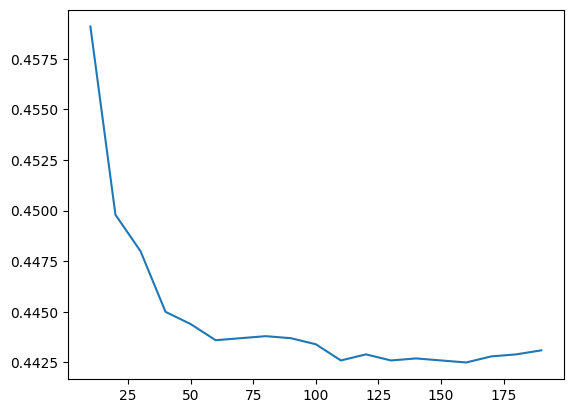

In [82]:
plt.plot(df_rmse_scores.n_estimators, df_rmse_scores.rmse)

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`

What's the best `max_depth`, using the mean RMSE?
* 10
* 15
* 20
* 25


In [83]:
results = []

for max_depth in [10, 15, 20, 25]:
    depth_scores = []
    
    for n in range(10, 201, 10):
        rfr = RandomForestRegressor(n_estimators=n, max_depth=max_depth, random_state=1, n_jobs=-1)
        rfr.fit(X_train, y_train)
        
        y_pred = rfr.predict(X_val)
        y_pred_original = np.expm1(y_pred)
    
        r = rmse(y_val_original, y_pred_original)
        depth_scores.append(r)
    
    mean_rmse = np.mean(depth_scores)
    results.append((max_depth, mean_rmse))
    print(f"max_depth={max_depth}, mean RMSE: {mean_rmse:.4f}")

best_result = min(results, key=lambda x: x[1])
print(f"\nBest max_depth: {best_result[0]} with mean RMSE: {best_result[1]:.4f}")

max_depth=10, mean RMSE: 0.4413
max_depth=15, mean RMSE: 0.4444
max_depth=20, mean RMSE: 0.4448
max_depth=25, mean RMSE: 0.4447

Best max_depth: 10 with mean RMSE: 0.4413


## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `vehicle_weight`
*	`horsepower`
* `acceleration`
* `engine_displacement`	


In [84]:
rfr_q5 = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rfr_q5.fit(X_train, y_train)

feature_names = dv.get_feature_names_out()
feature_importances = rfr_q5.feature_importances_

importance_dict = dict(zip(feature_names, feature_importances))

features_of_interest = ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']
for feature in features_of_interest:
    if feature in importance_dict:
        print(f"{feature}: {importance_dict[feature]:.4f}")

max_importance = 0
most_important = None
for feature in features_of_interest:
    if feature in importance_dict and importance_dict[feature] > max_importance:
        max_importance = importance_dict[feature]
        most_important = feature

print(f"\nMost important feature: {most_important}")

vehicle_weight: 0.9586
horsepower: 0.0165
acceleration: 0.0114
engine_displacement: 0.0033

Most important feature: vehicle_weight


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [88]:
import xgboost as xgb

In [89]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

# Train model with eta=0.3
model_eta_03 = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

y_pred_eta_03 = model_eta_03.predict(dval)
y_pred_orig_eta_03 = np.expm1(y_pred_eta_03)
rmse_eta_03 = rmse(y_val_original, y_pred_orig_eta_03)
print(f"\nRMSE with eta=0.3: {rmse_eta_03:.4f}")

# Train model with eta=0.1
xgb_params['eta'] = 0.1

model_eta_01 = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

# Get predictions and calculate RMSE for eta=0.1
y_pred_eta_01 = model_eta_01.predict(dval)
y_pred_orig_eta_01 = np.expm1(y_pred_eta_01)
rmse_eta_01 = rmse(y_val_original, y_pred_orig_eta_01)
print(f"\nRMSE with eta=0.1: {rmse_eta_01:.4f}")

# Compare results
print(f"\nComparison:")
print(f"eta=0.3: RMSE = {rmse_eta_03:.4f}")
print(f"eta=0.1: RMSE = {rmse_eta_01:.4f}")

[0]	train-rmse:0.11746	val-rmse:0.12140
[10]	train-rmse:0.02405	val-rmse:0.02896
[10]	train-rmse:0.02405	val-rmse:0.02896
[20]	train-rmse:0.02141	val-rmse:0.02871
[20]	train-rmse:0.02141	val-rmse:0.02871
[30]	train-rmse:0.02007	val-rmse:0.02889
[30]	train-rmse:0.02007	val-rmse:0.02889
[40]	train-rmse:0.01905	val-rmse:0.02900
[40]	train-rmse:0.01905	val-rmse:0.02900
[50]	train-rmse:0.01784	val-rmse:0.02914
[50]	train-rmse:0.01784	val-rmse:0.02914
[60]	train-rmse:0.01674	val-rmse:0.02924
[60]	train-rmse:0.01674	val-rmse:0.02924
[70]	train-rmse:0.01589	val-rmse:0.02930
[70]	train-rmse:0.01589	val-rmse:0.02930
[80]	train-rmse:0.01502	val-rmse:0.02942
[80]	train-rmse:0.01502	val-rmse:0.02942
[90]	train-rmse:0.01432	val-rmse:0.02951
[90]	train-rmse:0.01432	val-rmse:0.02951
[99]	train-rmse:0.01346	val-rmse:0.02970

RMSE with eta=0.3: 0.4497
[0]	train-rmse:0.14818	val-rmse:0.15303
[99]	train-rmse:0.01346	val-rmse:0.02970

RMSE with eta=0.3: 0.4497
[0]	train-rmse:0.14818	val-rmse:0.15303
[10]	t